# Local Ancestry Analysis for Admixed Individuals of Interest
Based on dimensionality reduction modeling, we have identified four individuals of interest. Two of whom are AMR individuals who cluster near ancestral populations and the other two are individuals from the ancestral populations. 

For HG00553 (PUR) & HG01879 (ACB), we will look at CEU, ACB, and PJL. For HG01572 (PEL) & HG02380 (CDX), we will look at CDX, CEU, and BEB. This was determined by selecting three subpopulations from super populations that seemed most fitting for the admixed individuals. 

## First, we prepared RFMix files for local ancestry

Below is our code from HG02380 for CDX and CEU. Here, we get .map, .alleles, and .snp_locations for each chromosome based on the background populations and our individual of interest. Similarly, we also get a .classes file displaying the subpopulations.

In [1]:
%%bash

cat /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample| grep "CDX\|CEU" | cut -d' ' -f 1 > /home/arholman/final/rfmix2/1kg.ref
cat /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample | grep "HG02380" | cut -d' ' -f 1 >> /home/arholman/final/rfmix2/1kg.ref

for i in $(seq 1 22)
do
    cmd="python2.7 /home/arholman/final/shapeit2rfmix-mg2.py \
    --shapeit_hap_ref /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3_chr${i}.hap.gz \
    --shapeit_hap_ref_legend /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3_chr${i}.legend.gz \
    --shapeit_sample_ref /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample \
    --ref_keep /home/arholman/final/rfmix2/1kg.ref \
    --chr ${i} \
    --genetic_map /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/genetic_map_chr${i}_combined_b37.txt \
    --out /home/arholman/final/rfmix2/rfmix"
    echo $cmd
done | xargs -I% -n1 -P2 sh -c "%"

Filling sites and genos from shapeit haps files [2020-05-29 23:53:48]
Getting intersection between reference and admixed sites [2020-05-29 23:54:16]
Getting genetic positions through known genetic map and interpolation [2020-05-29 23:54:26]
Writing classes file [2020-05-29 23:54:47]
Getting haplotypes of interest [2020-05-29 23:54:47]
Writing alleles file (total sites=2855220) [2020-05-30 00:11:27]
Done! [2020-05-30 00:12:24]
Filling sites and genos from shapeit haps files [2020-05-29 23:57:25]
Getting intersection between reference and admixed sites [2020-05-29 23:57:49]
Getting genetic positions through known genetic map and interpolation [2020-05-29 23:57:59]
Writing classes file [2020-05-29 23:58:53]
Getting haplotypes of interest [2020-05-29 23:58:53]
Writing alleles file (total sites=2652539) [2020-05-30 00:14:24]
Done! [2020-05-30 00:14:59]
Filling sites and genos from shapeit haps files [2020-05-30 00:12:51]
Getting intersection between reference and admixed sites [2020-05-30 0

Killed
Killed
Killed
Killed
Killed
Killed
Killed
Killed
Killed
Killed
Killed
Killed


CalledProcessError: Command 'b'\n# Prepare RFMix files for local ancestry\n\ncat /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample| grep "CDX\\|CEU" | cut -d\' \' -f 1 > /home/arholman/final/rfmix2/1kg.ref\ncat /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample | grep "HG01572" | cut -d\' \' -f 1 >> /home/arholman/final/rfmix2/1kg.ref\n\nfor i in $(seq 1 22)\ndo\n    cmd="python2.7 /home/arholman/final/shapeit2rfmix-mg2.py \\\n    --shapeit_hap_ref /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3_chr${i}.hap.gz \\\n    --shapeit_hap_ref_legend /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3_chr${i}.legend.gz \\\n    --shapeit_sample_ref /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample \\\n    --ref_keep /home/arholman/final/rfmix2/1kg.ref \\\n    --chr ${i} \\\n    --genetic_map /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/genetic_map_chr${i}_combined_b37.txt \\\n    --out /home/arholman/final/rfmix2/rfmix"\n    echo $cmd\ndone | xargs -I% -n1 -P2 sh -c "%"\n'' returned non-zero exit status 123.

### Fix classes file

In [15]:
%%bash

cat /datasets/cs284s-sp20-public/ps2/imputation/1000GP_Phase3/1000GP_Phase3.sample | grep "CDX\|CEU" | cut -f 2 -d' ' | sed 's/CDX/1/' | sed 's/CEU/2/'| awk '{print $0"\n"$0}' > /home/arholman/final/rfmix2/rfmix.classes
echo 0 | awk '{print $0"\n"$0}' >> /home/arholman/final/rfmix2/rfmix.classes
cat /home/arholman/final/rfmix2/rfmix.classes | datamash transpose | sed 's/\t/ /g' > del
mv del /home/arholman/final/rfmix2/rfmix.classes

## Next, we performed RFMix
Here, we are taking the alleles and snp locations for each chromosome and determining ancestry throughout the chromosome based on the haplotype of the individual. Here, the output we want to focus on is the Viterbi files. 

In [ ]:
%%bash

cd /sources/RFMix_v1.5.4/

for chrom in $(seq 13 22);
do
    echo "Running RFMix on chr${chrom}"
    python2.7 RunRFMix.py \
       --forward-backward \
       -w 0.2 \
       PopPhased \
       /home/arholman/final/rfmix2/rfmix_chr${chrom}.alleles \
       /home/arholman/final/rfmix2/rfmix.classes \
       /home/arholman/final/rfmix2/rfmix_chr${chrom}.snp_locations \
       -o ~/final/rfmix2/rfmix_${chrom}
done


## After performing RFMix, we need to change RFMix output into a format for plotting the karyotype

### First, paste together map and Viterbi files
Chromosome range depends on the chromosomes processed by RFMix.

In [18]:
%%bash

DIR=/home/arholman/final/rfmix2

for chrom in {13..13} {15..22};
do
    for hapcol in $(seq 4 5)
    do
    paste ${DIR}/rfmix_chr${chrom}.map ${DIR}/rfmix_${chrom}.0.Viterbi.txt | \
    sed 's/ /\t/g' | \
    datamash -g $hapcol min 1 max 1 min 2 max 2 > ${DIR}/chr${chrom}_$hapcol.txt
    done
done

### Next, replace numbers with subpopulations

In [19]:
%%bash

DIR=/home/arholman/final/rfmix2

for chrom in {13..13} {15..22}
do
    for hapcol in $(seq 4 5)
    do
    sed 's/^1/CDX/ ; s/^2/CEU/' ${DIR}/chr${chrom}_${hapcol}.txt > ${DIR}/chr${chrom}_${hapcol}.2.txt
    done
done

### After, add the chromosome numbers

In [20]:
%%bash

DIR=/home/arholman/final/rfmix2

for chrom in {13..13} {15..22}
do
    for hapcol in $(seq 4 5)
    do
    awk '{printf("%s\t%s\n", $0, "'${chrom}'") }' ${DIR}/chr${chrom}_${hapcol}.2.txt > ${DIR}/chr${chrom}_${hapcol}.3.txt
    done
done


### Following this, combine chromosomes into one file

In [21]:
%%bash

DIR=/home/arholman/final/rfmix2

for chrom in {13..13} {15..22}
do
    for hapcol in $(seq 4 5)
    do
    cat ${DIR}/chr${chrom}_${hapcol}.3.txt >> ${DIR}/hap.${hapcol}.txt
    done
done

### Lastly, match the columns to the bed file for the karyotyping

In [22]:
%%bash

DIR=/home/arholman/final/rfmix2

for hapcol in $(seq 4 5)
do
    if test $hapcol=4
    then 
    awk '{print $6 "\t" $2 "\t" $3 "\t" $1 "\t" $4 "\t"  $5 }' ${DIR}/hap.4.txt > ${DIR}/inferred_hap_samp0_0.bed
    fi
    if test $hapcol=5
    then 
    awk '{print $6 "\t" $2 "\t" $3 "\t" $1 "\t" $4 "\t"  $5 }' ${DIR}/hap.5.txt > ${DIR}/inferred_hap_samp0_1.bed
    fi
done


## After, we plotted the karyotype of the individuals

### Plot for HG01572 (PEL), the admixed individual

Populating the interactive namespace from numpy and matplotlib


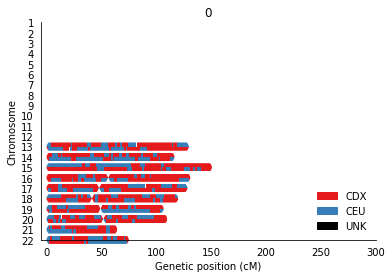

In [12]:
%pylab inline

import plot_karyogram as pk

bed_a = "/home/arholman/final/rfmix2/inferred_hap_samp0_0.bed"
bed_b = "/home/arholman/final/rfmix2/inferred_hap_samp0_1.bed"
pk.PlotKaryogram(bed_a, bed_b, 0, ["CDX","CEU"])
    
plt.show()    

### Plot for HG02380 (CDX), the control individual

Populating the interactive namespace from numpy and matplotlib


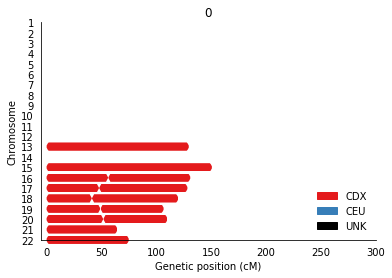

In [23]:
%pylab inline

import plot_karyogram as pk

bed_a = "/home/arholman/final/rfmix2/inferred_hap_samp0_0.bed"
bed_b = "/home/arholman/final/rfmix2/inferred_hap_samp0_1.bed"
pk.PlotKaryogram(bed_a, bed_b, 0, ["CDX","CEU"])
    
plt.show()    

## Lastly, to find the best dimensionality reduction model, we calculated which percent the individual is of CDX, CEU, or BEB

In [52]:
# import packages
import os
import pandas as pd

# import hap4 and hap5 files
hap5txt = os.path.join(os.environ["HOME"], "final/rfmix1,3pop,HG01572", "hap.5.txt")
hap5 = pd.read_csv(hap5txt, sep='\t', header=None)
hap4txt = os.path.join(os.environ["HOME"], "final/rfmix1,3pop,HG01572", "hap.4.txt")
hap4 = pd.read_csv(hap4txt, sep='\t', header=None)

# first, pull the distance in cM of each chromosome chunk per population
ceu_length = []
beb_length = []
cdx_length = []
for i in range(len(hap5)):
    if hap5.iloc[i,0] == 'CEU': # change for pop of interest
        dif_ceu = hap5.iloc[i,4] - hap5.iloc[i,3]
        ceu_length.append(dif_ceu)
    elif hap5.iloc[i,0] == 'BEB': # change for pop of interest
        dif_beb = hap5.iloc[i,4] - hap5.iloc[i,3]
        beb_length.append(dif_beb)
    elif hap5.iloc[i,0] == 'CDX': # change for pop of interest
        dif_cdx = hap5.iloc[i,4] - hap5.iloc[i,3]
        cdx_length.append(dif_cdx)
    else:
        pass

for i in range(len(hap4)):
    if hap4.iloc[i,0] == 'CEU': # change for pop of interest
        dif_ceu = hap4.iloc[i,4] - hap4.iloc[i,3]
        ceu_length.append(dif_ceu)
    elif hap4.iloc[i,0] == 'BEB': # change for pop of interest
        dif_beb = hap4.iloc[i,4] - hap4.iloc[i,3]
        beb_length.append(dif_beb)
    elif hap4.iloc[i,0] == 'CDX': # change for pop of interest
        dif_cdx = hap4.iloc[i,4] - hap4.iloc[i,3]
        cdx_length.append(dif_cdx)
    else:
        pass
    
# next, find the sum of all of the chunks
ceu_sum = sum(ceu_length)
beb_sum = sum(beb_length)
cdx_sum = sum(cdx_length)
all_length = ceu_sum + beb_sum + cdx_sum

# lastly, find percentages of overall to see admixture %%
perc_ceu = ceu_sum/all_length
perc_beb = beb_sum/all_length
perc_cdx = cdx_sum/all_length

# print percents
print("The percent of CEU is {}%, BEB is {}%, and CDX is {}%".format(perc_ceu*100, perc_beb*100, perc_cdx*100))


The percent of CEU is 23.724143828234784%, BEB is 22.75395815216242%, and CDX is 53.5218980196028%
